### Задача кредитного скоринга

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
from statsmodels.stats.proportion import proportion_confint

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('credit_card_default_analysis.csv')

* LIMIT_BAL:  размер кредитного лимита (в том числе и на семью клиента)
* SEX: пол клиента (1 = мужской, 2 = женский )
* EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
* MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных). 
* AGE: возраст в годах
* PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
* BILL_AMT1 - BILL_AMT6:  задолженность,  BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь 
* PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре 
* default - индикатор невозврата денежных средств

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [74]:
df.shape()

(30000, 25)

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


1. Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:   
a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки  
b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.  Значимы ли полученные результаты с практической точки зрения ?

In [7]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

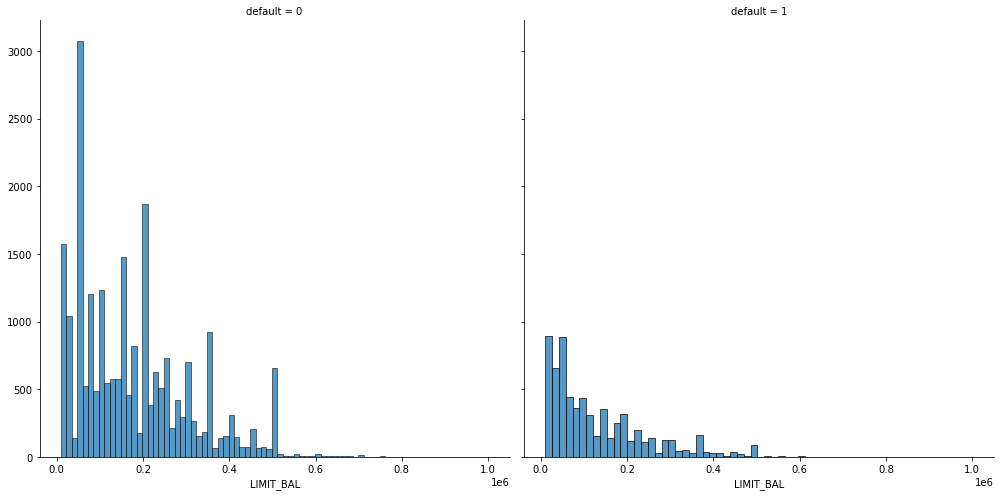

In [24]:
g = sns.FacetGrid(df, col="default", height=7)
g.map(sns.histplot, "LIMIT_BAL")

In [15]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [10]:
repayment_limit = df[df['default'] == 0]['LIMIT_BAL'].values
default_limit = df[df['default'] == 1]['LIMIT_BAL'].values

In [14]:
repayment_median = list(map(np.median, get_bootstrap_samples(repayment_limit, 1000)))
default_median = list(map(np.median, get_bootstrap_samples(default_limit, 1000)))

In [15]:
print("95% confidence interval for the repayment median credit limit:",  stat_intervals(repayment_median, 0.05))
print("95% confidence interval for the default median credit limit:",  stat_intervals(default_median, 0.05))

95% confidence interval for the repayment median credit limit: [150000. 150000.]
95% confidence interval for the default median credit limit: [80000. 90000.]


Проверка равенства распределения с помощью проверки равенства средних с помощью критерия Манна-Уитни и оценка разности средних.

In [79]:
print('Mann-Whitneyu statistic %.4f and p-value %.4f' % st.mannwhitneyu(repayment_limit, default_limit))
print('Точечная оценка разности среднего: %.0f' % (np.mean(repayment_limit) - np.mean(default_limit)))

Mann-Whitneyu statistic 59257217.5000 and p-value 0.0000
Точечная оценка разности среднего: 47990


2. Пол (SEX): Проверьте гипотезу о том,  что гендерный состав  группы людей вернувших и не вернувших кредит отличается.  Хорошо, если вы предоставите несколько различных решений  этой задачи (с помощью доверительного интервала и подходящего статистического критерия

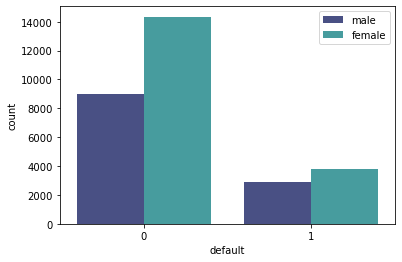

In [49]:
ax = sns.countplot(x="default", hue="SEX", data=df, palette="mako")
ax.legend(['male', 'female'])

Доверительный интервал для двух долей и их разности:

In [163]:
df_sex = df[['SEX', 'default']]
df_sex['SEX'] = df_sex['SEX'].apply(lambda x: x if x == 1 else 0)

c:\users\cohan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [166]:
repayment_sex = df_sex[df_sex['default'] == 0]['SEX']
default_sex = df_sex[df_sex['default'] == 1]['SEX']

In [167]:
conf_interval_repayment = proportion_confint(sum(repayment_sex), len(repayment_sex), method = 'wilson')
conf_interval_default = proportion_confint(sum(default_sex), len(default_sex), method = 'wilson')

In [168]:
print ('95%% confidence inrval for men proportion in repaument group [%f, %f]' % conf_interval_repayment)
print ('95%% confidence inrval for men proportion in default group [%f, %f]' % conf_interval_default)

95% confidence inrval for men proportion in repaument group [0.379627, 0.392110]
95% confidence inrval for men proportion in default group [0.421062, 0.444898]


In [169]:
def proportions_diff_confind_int(sample1, sample2, alpha = 0.05):    
    z = st.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [170]:
print('Confidence interval for p(repayment) - p(default): [%f, %f]' % proportions_diff_confint_ind(repayment_sex, default_sex))

Confidence interval for p(repayment) - p(default): [-0.060548, -0.033635]


Z-критерий для разности долей

In [171]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [172]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - st.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return st.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - st.norm.cdf(z_stat)

In [173]:
print("Z-test for a difference between proportions: %f, p-value: %f" % \
      (proportions_diff_z_stat_ind(repayment_sex, default_sex), \
      proportions_diff_z_test(proportions_diff_z_stat_ind(repayment_sex, default_sex))))

Z-test for a difference between proportions: -6.921375, p-value: 0.000000


3. Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг.  Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы  разность между наблюдаемым и ожидаемым количеством человек.  Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ?  Наличие какого образования является наилучшим индикатором того, что человек  отдаст долг ? наоборт, не отдаст долг ?

In [5]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

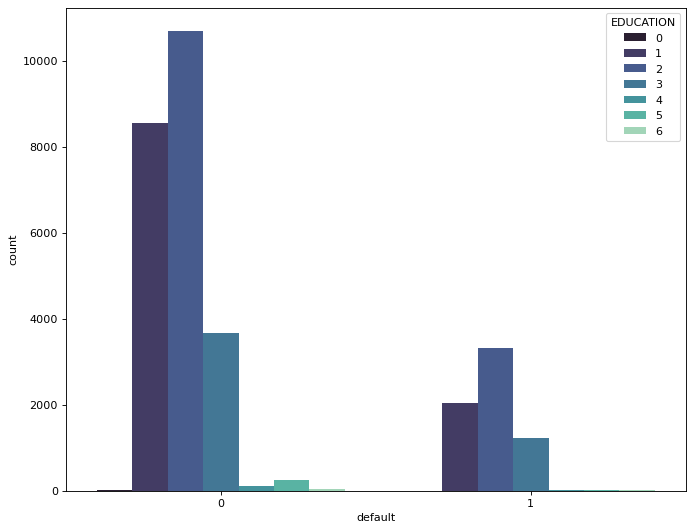

In [36]:
plt.figure(figsize=(10, 8), dpi=80)
ax = sns.countplot(x="default", hue="EDUCATION", data=df, palette="mako")

In [182]:
30000-51

29949

In [191]:
education_crosstab = pd.crosstab(df['default'], df['EDUCATION'], margins=True).drop([6, 'All'], axis=1)
all_people = education_crosstab.loc['All',[0,1,2,3,4,5]]
education_crosstab

EDUCATION,0,1,2,3,4,5
default,,,,,,
0,14,8549,10700,3680,116,262
1,0,2036,3330,1237,7,18
All,14,10585,14030,4917,123,280


In [193]:
education_crosstab_ed = education_crosstab.apply(lambda x: x - all_people/2, axis=1).drop(['All'], axis=0)

In [194]:
education_crosstab_ed

EDUCATION,0,1,2,3,4,5
default,,,,,,
0,7.0,3256.5,3685.0,1221.5,54.5,122.0
1,-7.0,-3256.5,-3685.0,-1221.5,-54.5,-122.0


In [195]:
chi2 = st.chi2_contingency(education_crosstab.drop(['All']))

In [196]:
fi = np.sqrt(chi2[0]/all_people.sum() * (2 - 1))

In [206]:
print('Chi-sq: %.4f \np_value: %.4f \nV Cramer\'s coef.: %.4f'% (chi2[0], chi2[1], fi))

Chi-sq: 161.9316 
p_value: 0.0000 
V Cramer's koef.: 0.0735


4. Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

In [200]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

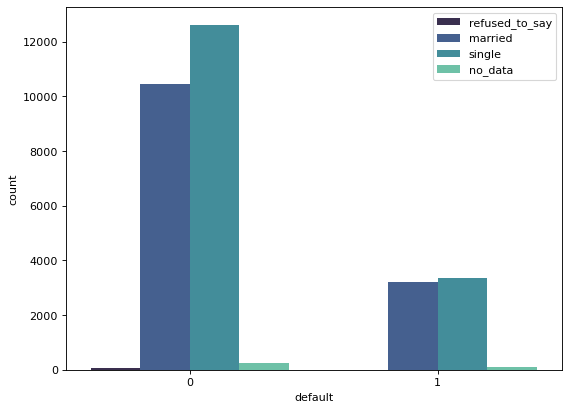

In [199]:
plt.figure(figsize=(8, 6), dpi=80)
ax = sns.countplot(x="default", hue="MARRIAGE", data=df, palette="mako")
ax.legend(['refused_to_say', 'married', 'single', 'no_data'])

In [223]:
marriage_crosstab = pd.crosstab(df['default'], df['MARRIAGE']).drop([0, 3], axis=1)
marriage_crosstab

MARRIAGE,1,2
default,,
0,10453,12623
1,3206,3341


In [224]:
a = marriage_crosstab.loc[[0], [1]].to_numpy().item()
b = marriage_crosstab.loc[[0], [2]].to_numpy().item()
c = marriage_crosstab.loc[[1], [1]].to_numpy().item()
d = marriage_crosstab.loc[[1], [2]].to_numpy().item()
n = a + b + c + d

In [235]:
# Проверяем необходимое условие для применения критерия Хи-квадрат
[((a+c)*(a+b))/n > 5,
((a+c)*(c+d))/n > 5,
((b+d)*(a+b))/n > 5,
((b+d)*(c+d))/n > 5]

[True, True, True, True]

In [244]:
MCC_mar = (a*d-b*c)/np.sqrt((a+b)*(a+c)*(b+d)*(c+d))
p_value = st.chi2_contingency(marriage_crosstab)[1]
print('Mathus coef. {} \nP-value: {}'.format(round(MCC_mar, 4), p_value))

Mathus coef. -0.0306 
P-value: 1.5633210355976673e-07


5. Возраст (AGE): Относительно двух групп людей  вернувших и не вернувших кредит  проверьте следующие гипотезы:   
a)  о равенстве медианных значений возрастов людей   
b) о равенстве распределений  с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

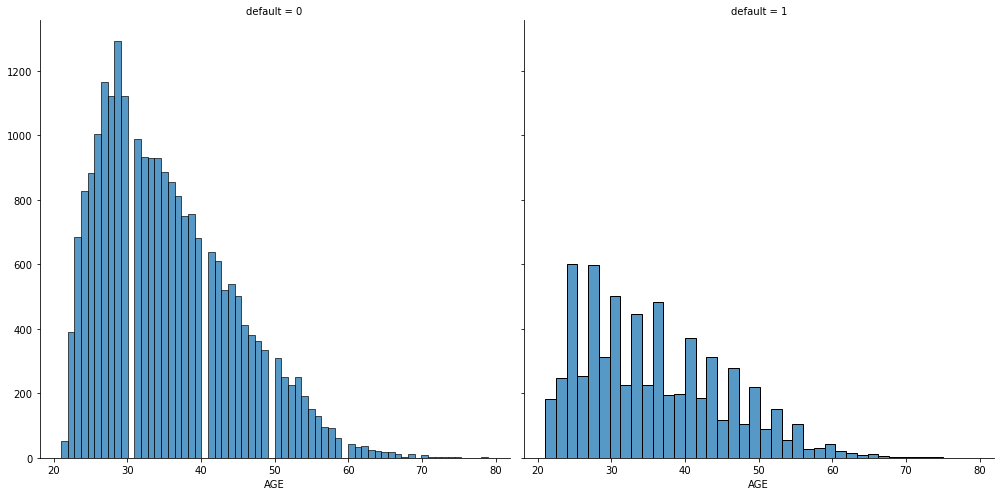

In [5]:
g = sns.FacetGrid(df, col="default", height=7)
g.map(sns.histplot, "AGE")

In [16]:
repayment_age = df[df['default'] == 0]['AGE'].values
default_age = df[df['default'] == 1]['AGE'].values

In [ ]:
chi2_contingency(GSS2014_happiness)